In [1]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt

In [2]:
Neptune = pd.read_csv('Neptune.csv')

In [3]:
df=Neptune.copy()

In [4]:
df['Boundaries'] = df['Fours'] + df['Sixes']

In [5]:
def is_dismissed(Batsman, Dismissal_type):
    if type(Batsman) == str:
        if Dismissal_type not in ['N/O']:
             return 1
        else:
            return 0
    else:
        return 0

In [6]:
df['is_Dismissed'] = df.apply(lambda x: is_dismissed(x['Batsman'], x['Dismissal_type']), axis = 1)

In [7]:
df.head()

,Match_No,Batsman,Balls,Runs,Fours,Sixes,Dismissal_type,Bowler_type,FOW,Overs,Balls_Bowled,Maiden,Runs_Coneded,Wickets,Dots,Bdry_Conceded,Boundaries,is_Dismissed
0,1.0,Swadesh,1,0,0,0,Caught,RF,0.0,3,18,0,6,0,12,0,0,1
1,1.0,Naveen,1,0,0,0,Caught,RF,1.0,0,0,0,0,0,0,0,0,1
2,1.0,Tamil,40,29,3,1,Caught,SLA,73.0,5,28,0,30,1,19,4,4,1
3,1.0,Srivathsan,10,15,3,0,Bowled,RM,37.0,0,0,0,0,0,0,0,3,1
4,1.0,Easwar,44,39,4,0,N/O,NaN,NaN,0,0,0,0,0,0,0,4,0


In [8]:
Run = pd.DataFrame(df.groupby(['Batsman'])['Runs'].sum()).reset_index()

In [9]:
Ball = pd.DataFrame(df.groupby(['Batsman'])['Balls'].sum()).reset_index()

In [10]:
Boundary = pd.DataFrame(df.groupby(['Batsman'])['Boundaries'].sum()).reset_index()

In [11]:
Innings = pd.DataFrame(df.groupby(['Batsman'])['Match_No'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'Match_No':'Matches'})

In [12]:
Dismissals = pd.DataFrame(df.groupby(['Batsman'])['is_Dismissed'].sum()).reset_index().rename(columns = {'is_Dismissed':'Dismissals'})

In [13]:
df1 = pd.merge(Innings, Run, on = 'Batsman').merge(Ball, on ='Batsman').merge(Dismissals, on = 'Batsman').merge(Boundary, on ='Batsman')

In [14]:
def BPD(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def BPB(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 
    
def SR(runs,balls):
    if balls > 0:
        return runs/balls
    else:
        return runs/1

df1['SR'] = df1.apply(lambda x: 100 * SR(x['Runs'], x['Balls']), axis = 1)
df1['RPM'] = df1.apply(lambda x: x['Runs']/x['Dismissals'], axis = 1)
df1['BPD'] = df1.apply(lambda x: BPD(x['Balls'], x['Dismissals']), axis = 1)
df1['BPB'] = df1.apply(lambda x: BPB(x['Balls'], (x['Boundaries'])), axis = 1)

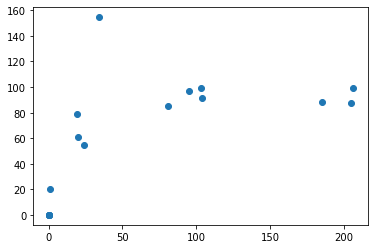

In [26]:
plt.scatter(df1.Runs, df1.SR)